In [23]:
!pip install matplotlib

In [24]:
!pip install tensorflow

In [25]:
# -*- coding: utf-8 -*-
"""
Created on Sun May 26 17:52:47 2024

@author: nanor
"""

'\nCreated on Sun May 26 17:52:47 2024\n\n@author: nanor\n'

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [27]:
# Cargar los datos preprocesados y las etiquetas
tfidf_df = pd.read_csv('tfidf_features.csv')
labels_df = pd.read_csv('labels.csv')

# Verificar que el número de muestras y etiquetas coincida
assert len(tfidf_df) == len(labels_df), "El número de muestras y etiquetas no coincide"

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, labels_df, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train.values.ravel())

# Realizar predicciones
y_pred = model.predict(X_test)

In [28]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5142857142857142
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.47      0.51        95
           1       0.47      0.56      0.51        80

    accuracy                           0.51       175
   macro avg       0.52      0.52      0.51       175
weighted avg       0.52      0.51      0.51       175

Confusion Matrix:
[[45 50]
 [35 45]]


Época 1, Precisión: 0.5142857142857142
Época 2, Precisión: 0.5085714285714286
Época 3, Precisión: 0.5257142857142857
Época 4, Precisión: 0.5257142857142857
Época 5, Precisión: 0.5314285714285715
Época 6, Precisión: 0.5314285714285715
Época 7, Precisión: 0.52
Época 8, Precisión: 0.52
Época 9, Precisión: 0.52
Época 10, Precisión: 0.52


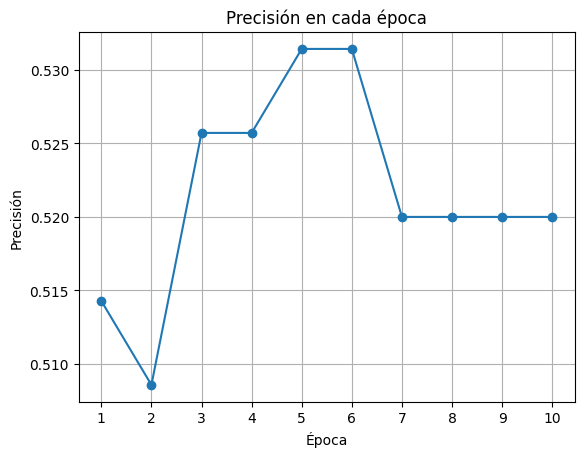

In [29]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Crear y entrenar el modelo Naive Bayes
model = MultinomialNB()
epocas=10

# Lista para guardar la precisión en cada época
accuracy_list = []

# Entrenar el modelo durante 5 épocas
for epoch in range(epocas):
    model.partial_fit(X_train, y_train.values.ravel(), classes=np.unique(y_train))
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    print(f"Época {epoch + 1}, Precisión: {accuracy}")

# Graficar la precisión en cada época
plt.plot(range(1, epocas+1), accuracy_list, marker='o')
plt.title('Precisión en cada época')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.xticks(range(1, epocas+1))
plt.grid(True)
plt.show()


En la gráfica observamos que entre la época 5 y 6 se alcanza el rendimiento óptimo. A partir de este punto, continuar el entrenamiento solo representa un gasto de cómputo innecesario, ya que la precisión se estabiliza en un 52%. Por lo tanto, podemos concluir que la época 5 es la óptima para este modelo.

Epoch 1/7


C:\Users\David\anaconda3\envs\proyectotextos\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4500 - loss: 0.6943 - val_accuracy: 0.5543 - val_loss: 0.6923
Epoch 2/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7151 - loss: 0.6835 - val_accuracy: 0.5143 - val_loss: 0.6940
Epoch 3/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8030 - loss: 0.6676 - val_accuracy: 0.4971 - val_loss: 0.6958
Epoch 4/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8131 - loss: 0.6357 - val_accuracy: 0.4857 - val_loss: 0.7008
Epoch 5/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8525 - loss: 0.5769 - val_accuracy: 0.4857 - val_loss: 0.7273
Epoch 6/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9107 - loss: 0.4663 - val_accuracy: 0.5029 - val_loss: 0.7519
Epoch 7/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9143 - loss: 0.3563 - val_accuracy: 0.5143 - val_loss: 0.8321
Precisión final en el conjunto de prueba: 0.5142857432365417


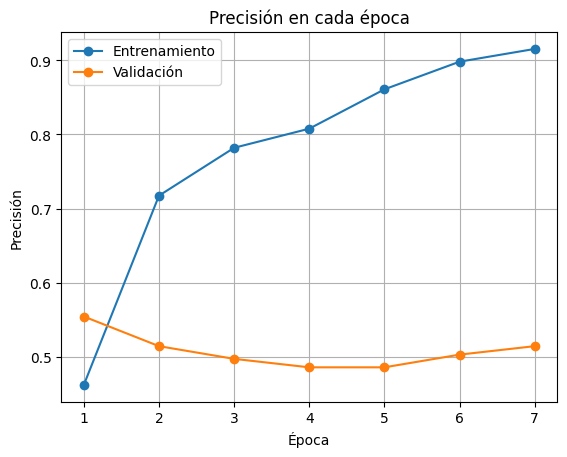

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

epocas=7

# Cargar los datos preprocesados y las etiquetas
tfidf_df = pd.read_csv('tfidf_features.csv')
labels_df = pd.read_csv('labels.csv')

# Verificar que el número de muestras y etiquetas coincida
assert len(tfidf_df) == len(labels_df), "El número de muestras y etiquetas no coincide"

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, labels_df, test_size=0.2, random_state=42)

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo durante 7 épocas y guardar el historial de entrenamiento
history = model.fit(X_train, y_train, epochs=epocas, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluar el modelo
accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Precisión final en el conjunto de prueba: {accuracy}")

# Graficar la precisión en cada época
plt.plot(range(1, epocas+1), history.history['accuracy'], marker='o', label='Entrenamiento')
plt.plot(range(1, epocas+1), history.history['val_accuracy'], marker='o', label='Validación')
plt.title('Precisión en cada época')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.xticks(range(1, epocas+1))
plt.legend()
plt.grid(True)
plt.show()

En la primera época se logró una precisión del 50% (0.5). Durante el entrenamiento, la precisión aumentó significativamente, alcanzando un 92% en la época 7. Sin embargo, al evaluar el modelo con los datos de validación, la precisión se mantuvo aproximadamente en un 50%, lo que sugiere que el modelo podría estar sobreajustado al conjunto de entrenamiento y no generaliza bien a nuevos datos.

Además, el punto óptimo para el entrenamiento, sin un gasto energético excesivo, podría ser la época número 3. Aunque este modelo muestra un buen rendimiento, se necesita un corpus más grande para que funcione de manera óptima. Esto se deduce de la pérdida de información: en la última época se queda en un 34%, mientras que en la primera época es del 69%, lo que indica la necesidad de un corpus más grande para mejorar la capacidad del modelo.